<a href="https://colab.research.google.com/github/phu-minh/CS116.M11.KHTN/blob/main/CS116_week3_19520218.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Bước 1 cài thư viện

In [ ]:
!pip install osmnet
!pip install matplotlib==3.1.3
!pip install osmnet
!pip install pandana
!pip install folium
!pip install geopandas
!pip install rtree
!pip install geopy

     |████████████████████████████████| 994 kB 7.6 MB/s 
     |████████████████████████████████| 15.4 MB 38 kB/s 
     |████████████████████████████████| 6.3 MB 31.6 MB/s 
     |████████████████████████████████| 13.1 MB 85 kB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


     |████████████████████████████████| 1.7 MB 5.2 MB/s 
     |████████████████████████████████| 994 kB 5.4 MB/s 


In [ ]:
!git clone https://github.com/CityScope/CSL_HCMC

Cloning into 'CSL_HCMC'...
remote: Enumerating objects: 1930, done.
remote: Counting objects: 100% (590/590), done.
remote: Compressing objects: 100% (315/315), done.
remote: Total 1930 (delta 308), reused 500 (delta 269), pack-reused 1340
Receiving objects: 100% (1930/1930), 176.98 MiB | 23.85 MiB/s, done.
Resolving deltas: 100% (985/985), done.
Checking out files: 100% (542/542), done.


### Bước 2 Read data

In [ ]:
import geopandas as gpd

population_path = "CSL_HCMC/Data/GIS/Population/population_HCMC/population_shapefile/Population_District_Level.shp"
shapefile = gpd.read_file(population_path)
shapefile

Dist_Name  ...                                           geometry
0    District 1  ...  POLYGON ((684948.318 1193882.223, 684971.256 1...
1    District 3  ...  POLYGON ((684382.122 1193521.050, 684410.753 1...
2    District 4  ...  POLYGON ((687625.438 1189132.516, 687615.280 1...
3    District 6  ...  POLYGON ((679534.413 1187518.498, 679077.904 1...
4    District 7  ...  POLYGON ((691506.715 1190058.151, 691359.893 1...
5   District 10  ...  POLYGON ((682507.505 1189929.778, 682485.431 1...
6   District 11  ...  POLYGON ((681349.265 1190928.179, 681382.887 1...
7     Phu Nhuan  ...  POLYGON ((682877.988 1195927.612, 682969.684 1...
8      Tan Binh  ...  POLYGON ((680274.980 1198401.860, 680578.965 1...
9    Binh Thanh  ...  POLYGON ((684986.154 1194412.964, 684987.226 1...
10       Go Vap  ...  POLYGON ((681111.422 1200741.940, 681181.234 1...
11      Tan Phu  ...  POLYGON ((678326.762 1196419.525, 678384.175 1...
12     Binh Tan  ...  POLYGON ((674953.073 1197210.125, 674961.146 1...
13       Cu Chi  ...  POLYGON ((656983.014 1228510.664, 656969.299 1...
14   Binh Chanh  ...  POLYGON ((679646.388 1186348.769, 679698.864 1...
15      Thu Duc  ...  POLYGON ((688796.063 1204383.598, 688818.721 1...
16   District 9  ...  POLYGON ((701125.957 1205414.891, 701162.391 1...
17   District 2  ...  POLYGON ((690496.729 1195354.084, 690716.888 1...
18       Nha Be  ...  POLYGON ((688444.826 1185726.125, 688568.759 1...
19      Can Gio  ...  POLYGON ((700872.044 1145155.470, 700166.970 1...
20   District 8  ...  POLYGON ((684830.242 1188930.683, 684834.555 1...
21   District 5  ...  POLYGON ((681680.481 1189761.424, 681682.881 1...
22  District 12  ...  POLYGON ((685183.891 1205265.848, 685198.395 1...
23      Hoc Mon  ...  POLYGON ((673061.206 1208548.077, 673094.550 1...

[24 rows x 26 columns]

In [ ]:
shapefile.head()

Dist_Name  ...                                           geometry
0  District 1  ...  POLYGON ((684948.318 1193882.223, 684971.256 1...
1  District 3  ...  POLYGON ((684382.122 1193521.050, 684410.753 1...
2  District 4  ...  POLYGON ((687625.438 1189132.516, 687615.280 1...
3  District 6  ...  POLYGON ((679534.413 1187518.498, 679077.904 1...
4  District 7  ...  POLYGON ((691506.715 1190058.151, 691359.893 1...

[5 rows x 26 columns]

###Bước 3 top 5 growth rate district

In [ ]:
import pandas as pd

df1 = pd.DataFrame(shapefile)

In [ ]:
df1['growth_rate2019'] = df1["Pop_2019"] / df1['Pop_2017']

In [ ]:
df1.head()

Dist_Name  ... growth_rate2019
0  District 1  ...        0.675244
1  District 3  ...        0.956202
2  District 4  ...        0.953424
3  District 6  ...        0.888886
4  District 7  ...        1.100641

[5 rows x 27 columns]

In [ ]:
top5_df = df1.sort_values(by = "growth_rate2019",ascending = False)
top5_df = top5_df.iloc[:5]
top5_df.head()

Dist_Name  ... growth_rate2019
16   District 9  ...        1.277619
23      Hoc Mon  ...        1.215639
18       Nha Be  ...        1.162071
22  District 12  ...        1.129460
17   District 2  ...        1.113104

[5 rows x 27 columns]

###Bước 4 Spatial join

In [ ]:

points_gdf = gpd.read_file('/content/drive/MyDrive/CS116/response.json')

points_gdf = points_gdf.to_crs('epsg:3857')
points_gdf.head()

dbh                          geometry
0    1  POINT (11872019.034 1207329.487)
1    1  POINT (11877786.259 1210214.349)
2    1  POINT (11849918.369 1232062.826)
3    1  POINT (11878671.435 1213380.697)
4    1  POINT (11870186.812 1212580.637)

In [ ]:
top5_gdf = gpd.GeoDataFrame(top5_df)
top5_gdf = top5_gdf.iloc[:5]

In [ ]:
top5_gdf = top5_gdf.to_crs('epsg:3857')
top5_gdf = top5_gdf[['Dist_Name','geometry']]

In [ ]:
top5_gdf

Dist_Name                                           geometry
16   District 9  POLYGON ((11893391.506 1220647.065, 11893427.9...
23      Hoc Mon  POLYGON ((11864832.709 1224020.903, 11864866.5...
18       Nha Be  POLYGON ((11880366.970 1200552.160, 11880492.7...
22  District 12  POLYGON ((11877158.951 1220589.634, 11877173.0...
17   District 2  POLYGON ((11882510.629 1210402.719, 11882734.6...

In [ ]:
from geopandas.tools import sjoin
joint_points_gdf = gpd.sjoin(points_gdf,top5_gdf)
joint_points_gdf.head()

dbh                          geometry  index_right    Dist_Name
11     1  POINT (11875275.657 1217143.649)           22  District 12
39     1  POINT (11870045.507 1219086.671)           22  District 12
48     1  POINT (11873453.934 1216505.997)           22  District 12
58     1  POINT (11871194.008 1216432.825)           22  District 12
133    1  POINT (11871628.708 1216481.209)           22  District 12

In [ ]:
joint_points_gdf.columns

Index(['dbh', 'geometry', 'index_right', 'Dist_Name'], dtype='object')

#KMean và lưu cluster mỗi quận trong 5 quận

In [ ]:
points_top5 = {}
list_points_top5 = []

for name in list(top5_gdf['Dist_Name']):
    data = joint_points_gdf.loc[joint_points_gdf['Dist_Name'] == name]['geometry']
    list_points_top5.append(data)

    coordinates = []
    for point in data:
        coordinates.append(point.coords[0])
    points_top5[name] = coordinates

print(list_points_top5[0])
print(points_top5)



141       POINT (11886066.037 1211498.445)
143       POINT (11893078.813 1215549.134)
167       POINT (11886092.753 1211175.445)
169       POINT (11886096.093 1210804.850)
186       POINT (11886096.093 1210787.850)
                        ...               
242157    POINT (11886096.093 1215004.037)
242325    POINT (11886079.395 1210971.447)
242340    POINT (11886066.037 1212464.062)
242419    POINT (11890415.133 1209372.330)
242486    POINT (11886076.055 1211008.847)
Name: geometry, Length: 4525, dtype: geometry
{'District 9': [(11886066.036676005, 1211498.444827495), (11893078.812537072, 1215549.133573878), (11886092.753353795, 1211175.445316985), (11886096.09293852, 1210804.8496596892), (11886096.09293852, 1210787.8499558007), (11890271.825387707, 1216812.7414754955), (11886072.715845453, 1212450.4612477862), (11886072.715845453, 1214500.7872791223), (11886066.036676005, 1211199.245176159), (11886082.734599624, 1210849.0489295784), (11886079.3950149, 1210811.6495436248), (11886089.4

In [ ]:
# X = points_top5['Nha Be'] 
# kmeans = KMeans(n_clusters = 30, init = 'k-means++')
# y_kmeans = kmeans.fit_predict(X)
# unique, counts = np.unique(kmeans.labels_, return_counts=True)           
# numPointEachPlace = dict(zip(unique, counts))
# print(numPointEachPlace)

{0: 138, 1: 45, 2: 17, 3: 102, 4: 22, 5: 14, 6: 5, 7: 18, 8: 40, 9: 259, 10: 7, 11: 93, 12: 18, 13: 21, 14: 24, 15: 10, 16: 6, 17: 139, 18: 7, 19: 7, 20: 3, 21: 14, 22: 18, 23: 135, 24: 12, 25: 5, 26: 39, 27: 21, 28: 3, 29: 1}


In [ ]:
counter_total = {}
label_total = {}
center_total = {}
list_top_label = {}
center_top_coord = {}

for name in list(top5_gdf['Dist_Name']):
    X = points_top5[name] 
    kmeans = KMeans(n_clusters = 30, init = 'k-means++')
    y_kmeans = kmeans.fit_predict(X)
    label_total[name] = y_kmeans

    unique, counts = np.unique(kmeans.labels_, return_counts=True)           
    temp = dict(zip(unique, counts))
    temp2 = sorted(temp.items(), key=lambda pair: pair[1], reverse=True)
    counter_total[name] = temp2
    list_top_label[name] = temp2[0][0]

    temp = kmeans.cluster_centers_
    center_total[name] = temp
    center_top_coord[name] = list(temp[temp2[0][0]])
    print('Done '+ name)

Done District 9
Done Hoc Mon
Done Nha Be
Done District 12
Done District 2


In [ ]:
print(list_top_label)
print(center_top_coord)

{'District 9': 0, 'Hoc Mon': 7, 'Nha Be': 28, 'District 12': 2, 'District 2': 16}
{'District 9': [11886080.82854564, 1211175.672912153], 'Hoc Mon': [11865166.282823205, 1219605.1704154415], 'Nha Be': [11882231.33509539, 1196849.8425052143], 'District 12': [11871149.179551763, 1216456.7050642068], 'District 2': [11883582.36865313, 1206112.1077324357]}


### show lên bản đồ

In [ ]:
from folium import plugins
import folium
from pyproj import Transformer

In [ ]:
transformer = Transformer.from_crs("EPSG:3857", "EPSG:4326")
base_point = center_top_coord['District 2']

print(base_point)

base_point = transformer.transform(base_point[0],base_point[1])
print(list(base_point))

map_top = folium.Map(location = base_point, zoom_start=10.5)

[11883582.36865313, 1206112.1077324357]
[10.77068746466477, 106.7520367185437]


In [ ]:
colors = ["cyan","blue","green","purple","beige"]

In [ ]:
list_of_points = points_top5['Nha Be']
print(len(list_of_points))
print(list_top_label['Nha Be'])
print(label_total['Nha Be'][0])

1243
28
14


In [ ]:
list_name = list(top5_gdf['Dist_Name'])
for name in list_name:
    idx = list_name.index(name)
    list_of_points = points_top5[name]
    point_plot = []

    for j in range(len(list_of_points)):
        if label_total[name][j] == list_top_label[name]:
          point = list_of_points[j]
          point = list(transformer.transform(point[0],point[1]))
          point_plot.append(point)

    plugins.HeatMap(point_plot).add_to(map_top)

    center= center_top_coord[name]
    center_coord = transformer.transform(center[0],center[1])
    folium.Marker(center_coord, icon=folium.Icon(color=colors[idx])).add_to(map_top)

In [ ]:
map_top

###Hough Transform

In [ ]:
from skimage.transform import hough_line, hough_line_peaks
from skimage.feature import canny
from skimage.draw import line
from skimage import data
from matplotlib import cm
import pandas as pd

In [ ]:
def to_numpy(data):
    points = []
    for point in data:
        coordinate = np.array(point)
        points.append([coordinate[1],coordinate[0]])
    return np.array(points)

In [ ]:
def convert_line_equation(theta,r):
    a = -np.cos(theta)/np.sin(theta)
    b = r/np.sin(theta)
    return (a,b)

def line_compute(input,theta,r):
    a = -np.cos(theta)/np.sin(theta)
    b = r/np.sin(theta)
    return a*input + b  #ax+b

def distance(point,a,b):
    x,y = point
    return abs((a*x-y+b))/(np.sqrt(a**2 + 1))

def IsPointInLine(y,x,a,b,offset):
    # y_hat = a*x+b
    # if ((y_hat-offset) < y) and (y < (y_hat+offset)):
    #     #print("True")
    #     return True
    # return False
    if distance((x,y),a,b) < offset:
        return True
    return False

In [ ]:
def DeNoise(data,offset,format = "epsg:3857"):
    # Chuyen sang list
    hits = data.to_crs('epsg:3857') 
    hits = to_numpy(hits['geometry'])
    x,y = (hits[:,1].astype('uint'),hits[:,0].astype('uint'))   #Tach x va y
    min_x,min_y = min(x), min(y)     #Luu lai min_x, min_y de khoi khuc lai

    #Normalize
    x = x - min(x)
    y = y - min(y)
    width,height = (int(max(x)-min(x)+1),int(max(y)-min(y)+1)) 
    print("width,height", width,height)

    #Tao matran 2D de dufng hough transform
    img = np.zeros((width,height), dtype=np.float32)   #anh kich thuoc hang x cot <=> 
    print(img.shape)
    for i,j in zip(x,y):
        img[i][j] = 1
    

    kernel = np.ones((20,20), np.uint8)
    img_dilate = cv2.dilate(np.float32(img), kernel, iterations=1)   # dilate de tang kich thuoc moi diem

    #Visualize befor denoise
    fig, axes = plt.subplots(1, 3, figsize=(18, 18))
    ax = axes.ravel()
    ax[0].imshow(img_dilate, cmap=cm.gray)
    ax[0].set_title('Before')

    
    #Detect Line by Hough transform
    tested_angles = np.linspace(-np.pi / 2, np.pi / 2, 360, endpoint=False)
    h, theta, d = hough_line(img_dilate, theta=tested_angles)

    line_argument = []
    line_argument_theta = []

    ax[1].imshow(img_dilate, cmap=cm.gray)
    ax[1].set_title('Detect line')
    for _, angle, dist in zip(*hough_line_peaks(h, theta, d)):
        line_argument_theta.append([angle, dist])
        #(x0, y0) = dist * np.array([np.cos(angle), np.sin(angle)])
        #ax[2].axline((x0, y0), slope=np.tan(angle + np.pi/2))
        #m =  np.array(list(range(0,100,1)))
        #n =  line_compute(x,angle,dist)
        if abs(angle) > 1.4 and abs(angle) < 1.6:
            print(angle, dist)
            (x0, y0) = dist * np.array([np.cos(angle), np.sin(angle)])
            ax[1].axline((x0, y0), slope=np.tan(angle + np.pi/2))
            line_argument.append(convert_line_equation(angle,dist))

    # print("line_argument before process", len(line_argument))
    # new = []
    # for line in line_argument:
    #     if line[0] > -5 and line[0] < 5:
    #         new.append(line)
    # line_argument= new
    # print("line_argument after process", len(line_argument))

    #Remove Noise
    offset = offset   #Theshold: Neu khoang cach giua Point va Line < offset thi xoa point
    new_points = []
    print(len(x),len(y))
    num_del = 0
    for m,n in zip(x,y):
        is_del = False
        for a,b in line_argument:
            if IsPointInLine(m,n,a,b,offset):
                # if is_del == True:
                #     num_del += 1
                # else:
                #     is_del = True
                is_del = True
                num_del += 1
                continue
        if is_del == False:
            new_points.append((m,n))
    print("Num point deleted ",num_del, "points")
    print("Remain point", len(new_points))

    #Visualize after denoise
    img = np.zeros((width,height), dtype=np.float32)   #anh kich thuoc hang x cot <=> 
    print(img.shape)
    for point in new_points:
        img[point[0]][point[1]] = 1

    kernel = np.ones((20,20), np.uint8)
    img_dilate = cv2.dilate(np.float32(img), kernel, iterations=1)
    ax[2].imshow(img_dilate, cmap=cm.gray)
    ax[2].set_title('After')

    #Return geopandas after denoise
    new_points = np.array(new_points)
    new_points[:,0] = new_points[:,0] + min_x
    new_points[:,1] = new_points[:,1] + min_y
    
    df = pd.DataFrame(
    { 'Latitude': new_points[:,1],
     'Longitude': new_points[:,0]})
    
    gdf = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df.Longitude, df.Latitude))

    
    gdf.crs = "epsg:3857"
    gdf = gdf['geometry']
    if format == "epsg:4326":
        gdf = gdf.to_crs('epsg:4326')
        
    return gdf


In [ ]:
#click_w_district_data = gpd.sjoin(data_gws84,district_data,op='within')

In [ ]:
#Test Denoise each district
District9 = click_w_district_data.loc[click_w_district_data['Dist_Name'] == 'Nha Be'] # Lay du lieu 1 quan

width,height 10572 15336
(10572, 15336)
1.4660765716752366 7790.709124097386
1.457349925415265 7884.7116473841015
1.5009831567151233 7412.698977263575
1.4748032179352086 7698.706654497622
1.457349925415265 7905.712211097092
1.5097098029750953 7308.696185542103
1.4835298641951802 7597.703943306577
1.4835298641951802 7615.704426489141
-1.4922565104551517 -5564.649370520496
-1.5184364492350666 -6307.669315222936
-1.4835298641951802 -5452.646364051219
-1.53588974175501 -6088.66343650176
1.4922565104551517 7503.701420019861
1.5184364492350668 7203.693366977153
-1.5184364492350666 -5871.657611467534
1.4748032179352086 7713.707057149757
-1.5184364492350666 -5912.658712050037
1.4660765716752366 7815.709795184277
-1.5271630954950384 -5974.66037634553
-1.5009831567151233 -5670.65221592892
-1.53588974175501 -6520.675032883259
-1.5271630954950384 -6023.661691675839
1.5446163880149815 6911.68552868225
-1.4748032179352084 -5341.643384425417
-1.509709802975095 -6209.666684562319
-1.5009831567151233 -

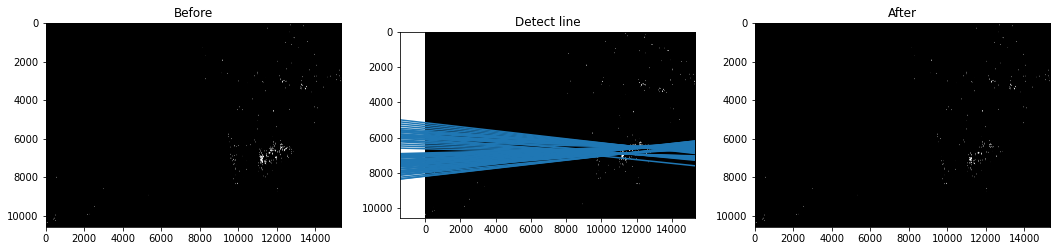

In [ ]:
res = DeNoise(District9,30,'epsg:4326')

In [ ]:
res

0        POINT (106.75217 10.74272)
1        POINT (106.77435 10.80270)
2        POINT (106.73950 10.80691)
3        POINT (106.77462 10.80084)
4        POINT (106.75193 10.74848)
                    ...            
21161    POINT (106.75178 10.75160)
21162    POINT (106.75250 10.75532)
21163    POINT (106.75253 10.74473)
21164    POINT (106.75172 10.76987)
21165    POINT (106.75172 10.78553)
Name: geometry, Length: 21166, dtype: geometry

In [ ]:
#TRUOC DENOISE
map = folium.Map([10.8265, 106.7085],zoom_start=13)
HeatMap(to_numpy(District9['geometry'])).add_to(folium.FeatureGroup(name='Heat Map').add_to(map))
folium.LayerControl().add_to(map)
map

In [ ]:
#SAU DENOISE
map = folium.Map([10.8265, 106.7085],zoom_start=13)
HeatMap(to_numpy(res)).add_to(folium.FeatureGroup(name='Heat Map').add_to(map))
folium.LayerControl().add_to(map)
map

#Step 10: Preprocess and retry step 6-7-8 with Preprocess data

District 9
width,height 13098 14711
(13098, 14711)
-1.5707963267948966 -1799.5456807046903
-1.562069680534925 -1734.5440306653436
1.562069680534925 1857.547153047497
1.5533430342749535 1901.548269997209
-1.5533430342749532 -1689.542888330412
4525 4525
Num point deleted  10769 points
Remain point 1491
(13098, 14711)
Hoc Mon
width,height 18062 10765
(18062, 10765)
-1.4311699866353502 -9257.720138872375
-1.4049900478554354 -5330.626756711767
-1.4660765716752369 -5801.637956863957
-1.4224433403753785 -9228.7194492664
-1.4748032179352084 -5891.640097020425
-1.5184364492350666 -6180.646969300644
1.439896632895322 7415.676337003308
-1.4398966328953218 -9333.721946115615
-1.4486232791552935 -9399.723515563692
1.5097098029750953 6966.665660000479
-1.5184364492350666 -6194.6473022138725
1.413716694115407 11307.768886880844
1.4224433403753785 11262.767816802607
1.5271630954950384 6852.662949135618
-1.413716694115407 -5418.628849309203
1.4835298641951802 9724.731243906503
1.4748032179352086 7192.6

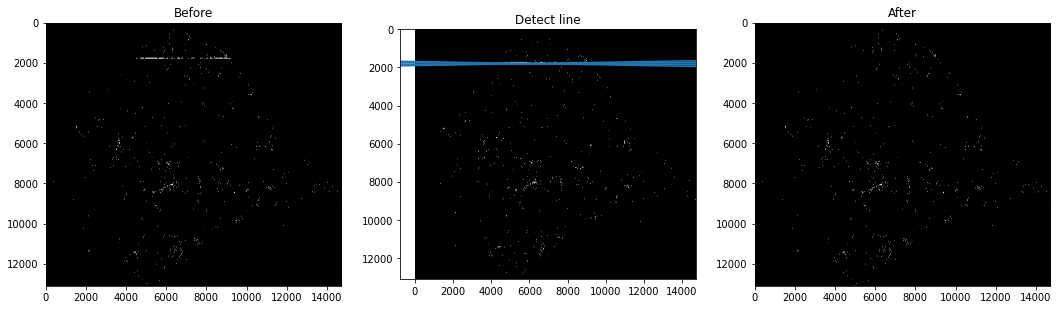

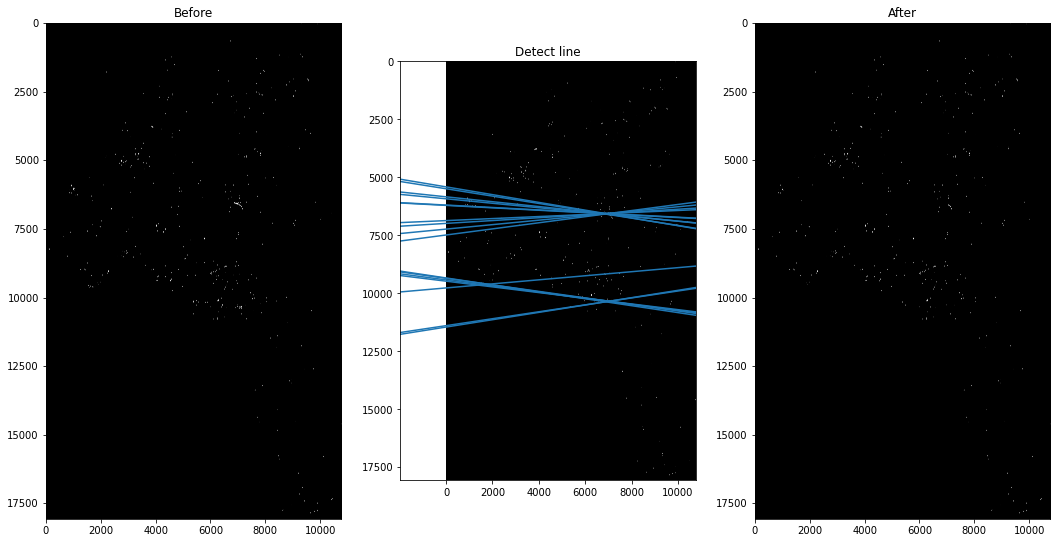

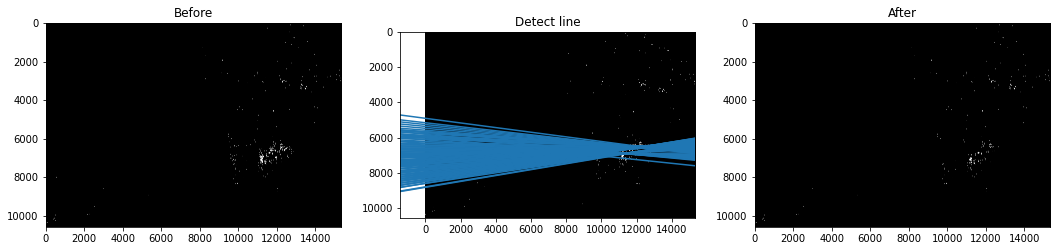

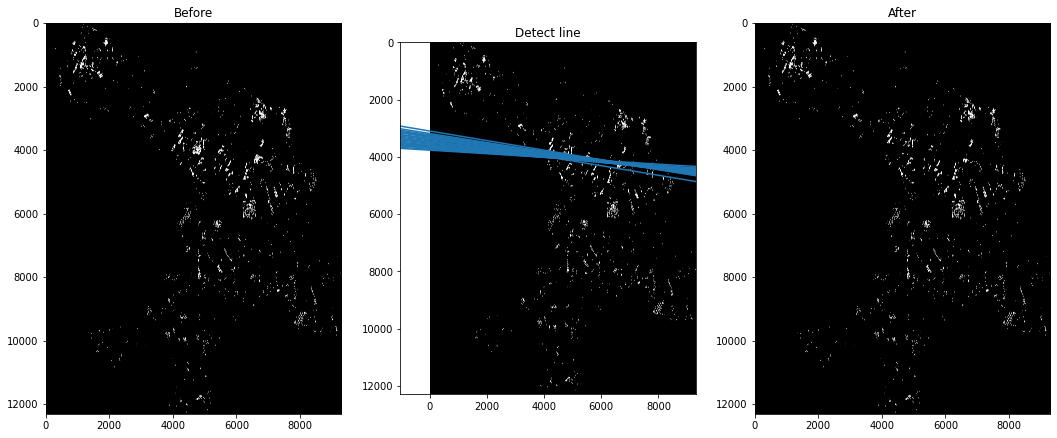

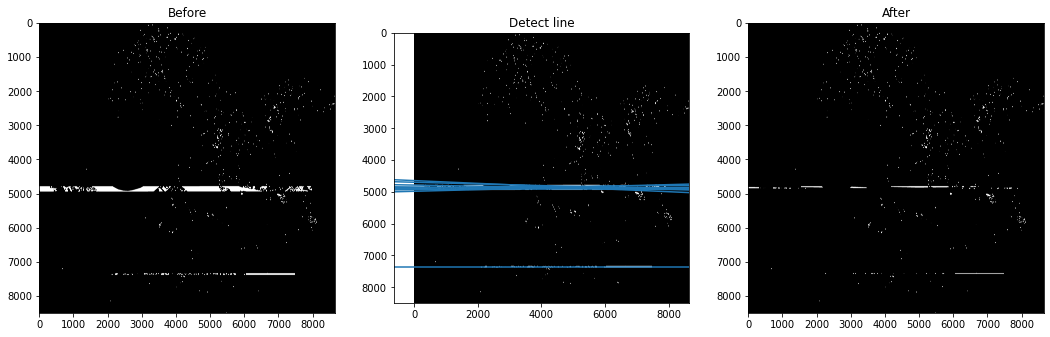

In [ ]:
points_of_districs_preprocessed = {}
for name in tops['Dist_Name']:
    print(name)
    district_data = click_w_district_data.loc[click_w_district_data['Dist_Name'] == name]
    #print(district_data.head())
    data_point = DeNoise(district_data,20,'epsg:4326')
    points_of_districs_preprocessed[name] = to_numpy(data_point)

In [ ]:
Top1EachDistrict = findTop1EachDistrict(tops['Dist_Name'],points_of_districs_preprocessed) 

for d in Top1EachDistrict.keys():
    print(d,len(Top1EachDistrict[d][0]))

map = folium.Map([10.814282371797505, 106.6531583943005])

layers = []
mcg = folium.plugins.MarkerCluster(control=False)
map.add_child(mcg)
colors = ['red', 'blue', 'green', 'purple', 'orange', 'darkred', 'lightred', 'beige', 'darkblue', 'darkgreen', 'black']

for i,district in enumerate(Top1EachDistrict.keys()):
    layers.append(folium.plugins.FeatureGroupSubGroup(mcg, district))
    map.add_child(layers[i])

    folium.Marker(
            Top1EachDistrict[district][-1], popup=district,
            icon=folium.Icon(color=colors[int(i)])
    ).add_to(map)

    HeatMap(Top1EachDistrict[district][0]).add_to(folium.FeatureGroup(name=district ).add_to(map))

folium.LayerControl().add_to(map)
map

District 9 120
Hoc Mon 55
Nha Be 130
District 12 374
District 2 789
